# Data augmentation

The idea is simple: we don't have that many images, so let's make the most of the few we have. We'll generate new images by applying a number of transformations to the ones we have: we will zoom in, out, distort them a bit, translate them, rotate them... 

Luckily, we basically don't have to code any of this: it's already provided by the ImageDataGenerator class in Keras!

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense
from keras.optimizers import Adam
import os

base_dir = 'databackup/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

Using TensorFlow backend.


In [2]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(72,72),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(72,72),
                                                        batch_size=100,
                                                        class_mode='binary')

Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [3]:
my_2nd_cnn = keras.Sequential()
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Flatten())
my_2nd_cnn.add(Dense(64, activation='relu'))
my_2nd_cnn.add(Dense(1, activation='sigmoid'))

my_2nd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

In [4]:
my_2nd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_2nd_cnn.fit_generator(train_generator,
                                   class_weight = {0: 7, 1: 1},
                                   steps_per_epoch=30,
                                   epochs=25,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/25
30/30 [==============================] - 50s 2s/step - loss: 1.2265 - acc: 0.7130 - val_loss: 0.3536 - val_acc: 0.8512
Epoch 2/25
30/30 [==============================] - 14s 455ms/step - loss: 0.9229 - acc: 0.6917 - val_loss: 0.3042 - val_acc: 0.8634
Epoch 3/25
30/30 [==============================] - 14s 452ms/step - loss: 0.8892 - acc: 0.7360 - val_loss: 0.4608 - val_acc: 0.7824
Epoch 4/25
30/30 [==============================] - 15s 489ms/step - loss: 0.8344 - acc: 0.7334 - val_loss: 0.4981 - val_acc: 0.7409
Epoch 5/25
30/30 [==============================] - 13s 448ms/step - loss: 0.8359 - acc: 0.7700 - val_loss: 0.4022 - val_acc: 0.8138
Epoch 6/25
30/30 [==============================] - 14s 459ms/step - loss: 0.7749 - acc: 0.7713 - val_loss: 0.5708 - val_acc: 0.7287
Epoch 7/25
30/30 [==============================] - 14s 452ms/step - loss: 0.7761 - acc: 0.7910 - val_loss: 0.3998 - val_acc: 0.8097
Epoch 8/25
30/30 [==============================] - 13s 444ms/step - los

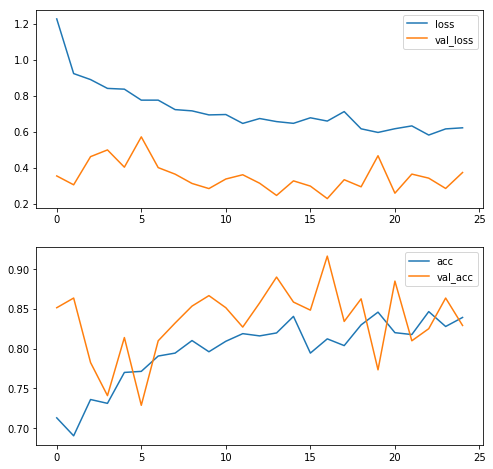

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

0.112449799197 0.245614035088


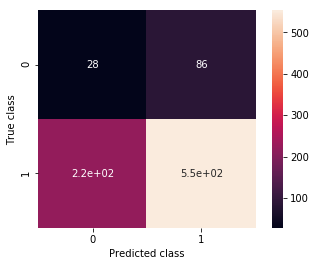

In [6]:
from mateosio import plot_confusion_matrix

ax, precision, recall = plot_confusion_matrix(my_2nd_cnn, validation_generator)
print(precision, recall)

Wow, now I am underfitting! I guess that means I can make my model even a bit more complex, let's see

### One more layer

In [7]:
my_3rd_cnn = keras.Sequential()
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Flatten())
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(64, activation='relu'))
my_3rd_cnn.add(Dense(1, activation='sigmoid'))

my_3rd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
__________

In [8]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_3rd_cnn.fit_generator(train_generator,
                                   class_weight = {0: 7, 1: 1},
                                   steps_per_epoch=30,
                                   epochs=20,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/20
30/30 [==============================] - 17s 566ms/step - loss: 1.1390 - acc: 0.5524 - val_loss: 0.5325 - val_acc: 0.7480
Epoch 2/20
30/30 [==============================] - 13s 443ms/step - loss: 0.9638 - acc: 0.7304 - val_loss: 0.7474 - val_acc: 0.5779
Epoch 3/20
30/30 [==============================] - 14s 464ms/step - loss: 0.8712 - acc: 0.7010 - val_loss: 0.4995 - val_acc: 0.7530
Epoch 4/20
30/30 [==============================] - 14s 481ms/step - loss: 0.8002 - acc: 0.7331 - val_loss: 0.5962 - val_acc: 0.6508
Epoch 5/20
30/30 [==============================] - 14s 455ms/step - loss: 0.7428 - acc: 0.7853 - val_loss: 0.3504 - val_acc: 0.8269
Epoch 6/20
30/30 [==============================] - 14s 466ms/step - loss: 0.7151 - acc: 0.7900 - val_loss: 0.4278 - val_acc: 0.7642
Epoch 7/20
30/30 [==============================] - 13s 444ms/step - loss: 0.7682 - acc: 0.7608 - val_loss: 0.3425 - val_acc: 0.8289
Epoch 8/20
30/30 [==============================] - 14s 461ms/step - 

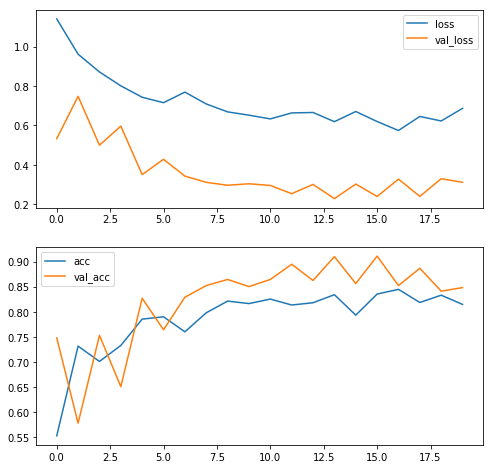

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

0.138755980861 0.254385964912


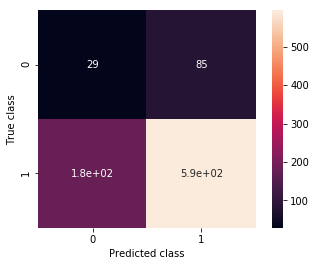

In [11]:
ax, precision, recall = plot_confusion_matrix(my_3rd_cnn, validation_generator)
print(precision, recall)

One of the best pieces of advice I got from Jeremy Howard's Deep Learning for Coders is that you should first attempt to overfit, then deal with that through regularization. It makes a lot of sense: once you have overfitting, you know you've juiced your model to the max. If you don't, you don't know whether there is still a lot of life left on it or it's at the maximum performance it's going to get. Let's go for that overfitting. 

Once a model stops improving with a particular learning rate, it's often useful to reduce the learning rate and keep training.

In [12]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-4),
                   metrics=['acc'])

history_pt2 = my_3rd_cnn.fit_generator(train_generator,
                                       class_weight = {0: 7, 1: 1},
                                       steps_per_epoch=30,
                                       epochs=30,
                                       validation_data=validation_generator,
                                       validation_steps=10,
                                       verbose=1)

Epoch 1/30
30/30 [==============================] - 17s 558ms/step - loss: 0.6200 - acc: 0.8180 - val_loss: 0.3093 - val_acc: 0.8472
Epoch 2/30
30/30 [==============================] - 13s 450ms/step - loss: 0.5367 - acc: 0.8460 - val_loss: 0.2608 - val_acc: 0.8806
Epoch 3/30
30/30 [==============================] - 14s 460ms/step - loss: 0.5539 - acc: 0.8413 - val_loss: 0.2799 - val_acc: 0.8674
Epoch 4/30
30/30 [==============================] - 15s 484ms/step - loss: 0.5396 - acc: 0.8470 - val_loss: 0.2609 - val_acc: 0.8806
Epoch 5/30
30/30 [==============================] - 14s 456ms/step - loss: 0.5375 - acc: 0.8470 - val_loss: 0.2378 - val_acc: 0.8968
Epoch 6/30
30/30 [==============================] - 14s 457ms/step - loss: 0.5252 - acc: 0.8445 - val_loss: 0.2477 - val_acc: 0.8907
Epoch 7/30
30/30 [==============================] - 14s 463ms/step - loss: 0.5570 - acc: 0.8533 - val_loss: 0.2475 - val_acc: 0.8937
Epoch 8/30
30/30 [==============================] - 14s 454ms/step - 

0.127906976744 0.19298245614


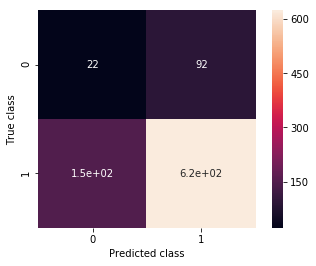

In [13]:
ax, precision, recall = plot_confusion_matrix(my_3rd_cnn, validation_generator)
print(precision, recall)